In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [297]:
df=pd.read_csv('advertising.csv')

In [298]:
df.head()


,tv,radio,journaux,ventes
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [299]:
df.describe()

,tv,radio,journaux,ventes
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='tv', ylabel='ventes'>

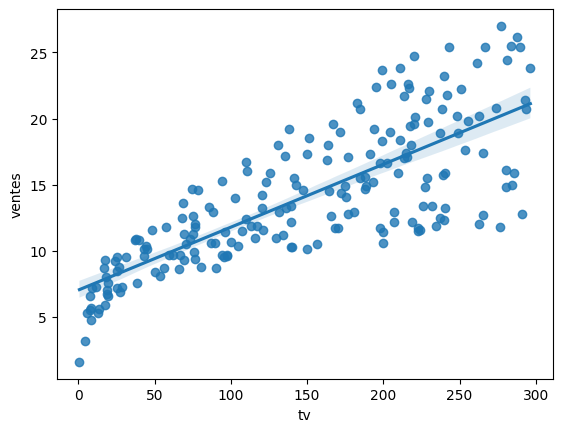

In [300]:
sns.regplot(x='tv', y='ventes', data=df)


<Axes: xlabel='radio', ylabel='ventes'>

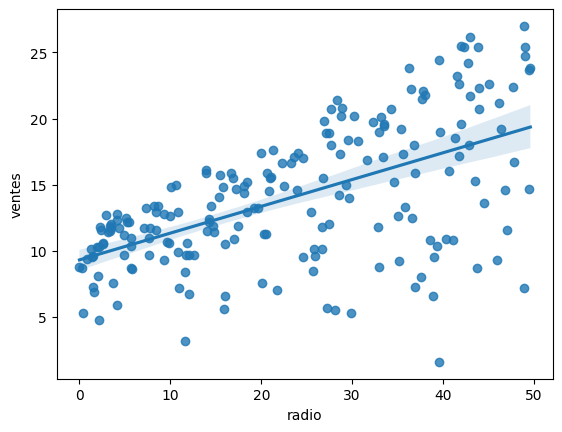

In [301]:
sns.regplot(x='radio', y='ventes', data=df)


<Axes: xlabel='journaux', ylabel='ventes'>

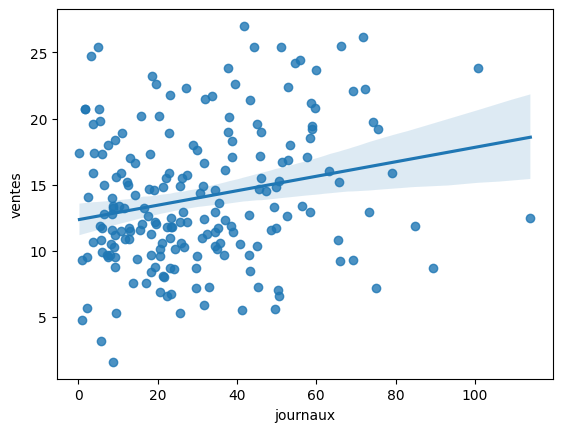

In [302]:

sns.regplot(x='journaux', y='ventes', data=df)

# on constate que l'incertitude du tv est moins grand k celle de rdio, qui est moins grand que celui des journaux

In [303]:
df.corr()

,tv,radio,journaux,ventes
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
journaux,0.056648,0.354104,1.000000,0.228299
ventes,0.782224,0.576223,0.228299,1.000000


In [304]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [305]:
x=df[['tv','radio','journaux']]
y=df['ventes']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [307]:
reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [308]:
y_pred_test=reg.predict(X_test)

In [309]:
print("Mean Absolute Error:", mean_squared_error(y_test, y_pred_test))
print("Mean Squared Error:", mean_absolute_percentage_error(y_test, y_pred_test))

Mean Absolute Error: 3.1740973539761033
Mean Squared Error: 0.15198846602831226


#comme le RMSE n'est pas bsolu, on va tester un modele polinomial en elevant au carré tv qui a une partie qui n'est pas visiblement linéaire

In [310]:
df['tv2']=df['tv']**2

In [311]:
scaler=MinMaxScaler()

In [312]:
scaler.fit(df)

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [313]:
data_array=scaler.transform(df)

In [314]:
df=pd.DataFrame(data_array, columns=['tv','radio','journaux','ventes','tv2'])

In [315]:
df.describe().loc[['min','max']]

,tv,radio,journaux,ventes,tv2
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


In [316]:
X=df[['tv','radio','journaux','tv2']]
y=df['ventes']

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [318]:
reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [319]:
y_hat_test=reg.predict(X_test)

In [320]:
print("coefficients:", reg.coef_)
print("MSRE, after feature engineering:", mean_squared_error(y_test, y_hat_test))
print("MAPE, after feature engineering:", mean_absolute_percentage_error(y_test, y_hat_test))

coefficients: [ 0.88007136  0.37464292  0.02197664 -0.36578279]
MSRE, after feature engineering: 0.0036863988616064615
MAPE, after feature engineering: 0.16200182799935664


In [321]:
df['tv_radio']=df['tv']*df['radio']

In [322]:
df.head()

,tv,radio,journaux,ventes,tv2,tv_radio
0,0.775786,0.762097,0.605981,0.807087,0.602664,0.591224
1,0.148123,0.792339,0.394019,0.346457,0.022535,0.117364
2,0.055800,0.925403,0.606860,0.303150,0.003362,0.051637
3,0.509976,0.832661,0.511873,0.665354,0.261253,0.424638
4,0.609063,0.217742,0.510994,0.444882,0.372080,0.132619


In [323]:
df.describe().loc[['min','max']]


,tv,radio,journaux,ventes,tv2,tv_radio
min,0.0,0.0,0.0,0.0,0.0,0.000000
max,1.0,1.0,1.0,1.0,1.0,0.920873


In [324]:
data_array=scaler.fit_transform(df)

In [325]:
df=pd.DataFrame(data_array, columns=['tv','radio','journaux','ventes','tv2','tv_radio'])

In [326]:
X1=df[['tv','radio','journaux','tv2','tv_radio']]
y1=df['ventes']

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [328]:
reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [329]:
y_pred=reg.predict(X_test)

In [330]:
print("coefficients:", reg.coef_)
print("MSRE, after feature engineering 2:", mean_squared_error(y_test, y_pred))
print("MAPE, after feature engineering 2:", mean_absolute_percentage_error(y_test, y_pred))

coefficients: [ 0.60221495  0.06911035  0.01859556 -0.3846345   0.56589688]
MSRE, after feature engineering 2: 0.0005689355134662454
MAPE, after feature engineering 2: 0.05976165903177545


In [331]:
new_data = pd.DataFrame(
    [[0.5, 0.2, 0.1, 0.25, 0.1]],
    columns=['tv', 'radio', 'journaux', 'tv2', 'tv_radio']
)

prediction = reg.predict(new_data)
print(prediction)

[0.41214126]
